In [ ]:
#import the libraries 
!pip install yfinance
!pip install pandas_ta 
import yfinance as yf 
import pandas as pd
import pandas_datareader.data as web
import pandas_ta as ta
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
yf.pdr_override()

In [ ]:

#load the price data
stocksymbols = ['BTC-USD', 'ETH-USD','BNB-USD','USDT-USD','SOL1-USD','HEX-USD','ADA-USD','XRP-USD','USDC-USD','LUNA1-USD',
       'AVAX-USD', 'DOT-USD', 'DOGE-USD' , 'SHIB-USD', 'MATIC-USD','LTC-USD', 'LINK-USD', 'ALGO-USD', 'UNI1-USD','DAI-USD']
startdate = datetime(2020,10,1)
end_date = datetime.today()
print(end_date)
def getMyPortfolio(stocks = stocksymbols ,start = startdate , end = end_date):
    data = web.get_data_yahoo(stocks , data_source='yahoo' , start = start ,end= end )
    return data

In [ ]:
btc_data = getMyPortfolio('BTC-USD')
eth_data = getMyPortfolio('ETH-USD')
bnb_data = getMyPortfolio('BNB-USD')
usdt_data = getMyPortfolio('USDT-USD')
sol_data = getMyPortfolio('SOL1-USD')
hex_data = getMyPortfolio('HEX-USD')
ada_data = getMyPortfolio('ADA-USD')

In [ ]:
xrp_data = getMyPortfolio('XRP-USD')
usdc_data = getMyPortfolio('USDC-USD')
luna1_data = getMyPortfolio('LUNA1-USD')
avax_data = getMyPortfolio('AVAX-USD')
dot_data = getMyPortfolio('DOT-USD')
doge_data = getMyPortfolio('DOGE-USD')
shib_data = getMyPortfolio('SHIB-USD')

In [ ]:
matic_data = getMyPortfolio('MATIC-USD')
ltc_data = getMyPortfolio('LTC-USD')
link_data = getMyPortfolio('LINK-USD')
algo_data = getMyPortfolio('ALGO-USD')
uni_data = getMyPortfolio('UNI1-USD')
dai_data = getMyPortfolio('DAI-USD')

In [66]:
btc_data['SMA 30'] = ta.sma(btc_data['Close'],30)
btc_data['SMA 100'] = ta.sma(btc_data['Close'],100)
eth_data['SMA 30'] = ta.sma(eth_data['Close'],30)
eth_data['SMA 100'] = ta.sma(eth_data['Close'],100)
bnb_data['SMA 30'] = ta.sma(bnb_data['Close'],30)
bnb_data['SMA 100'] = ta.sma(bnb_data['Close'],100)
usdt_data['SMA 30'] = ta.sma(usdt_data['Close'],30)
usdt_data['SMA 100'] = ta.sma(usdt_data['Close'],100)
sol_data['SMA 30'] = ta.sma(sol_data['Close'],30)
sol_data['SMA 100'] = ta.sma(sol_data['Close'],100)
hex_data['SMA 30'] = ta.sma(hex_data['Close'],30)
hex_data['SMA 100'] = ta.sma(hex_data['Close'],100)
ada_data['SMA 30'] = ta.sma(ada_data['Close'],30)
ada_data['SMA 100'] = ta.sma(ada_data['Close'],100)

In [67]:
xrp_data['SMA 30'] = ta.sma(xrp_data['Close'],30)
xrp_data['SMA 100'] = ta.sma(xrp_data['Close'],100)
usdc_data['SMA 30'] = ta.sma(usdc_data['Close'],30)
usdc_data['SMA 100'] = ta.sma(usdc_data['Close'],100)
luna1_data['SMA 30'] = ta.sma(luna1_data['Close'],30)
luna1_data['SMA 100'] = ta.sma(luna1_data['Close'],100)
avax_data['SMA 30'] = ta.sma(avax_data['Close'],30)
avax_data['SMA 100'] = ta.sma(avax_data['Close'],100)
dot_data['SMA 30'] = ta.sma(dot_data['Close'],30)
dot_data['SMA 100'] = ta.sma(dot_data['Close'],100)
doge_data['SMA 30'] = ta.sma(doge_data['Close'],30)
doge_data['SMA 100'] = ta.sma(doge_data['Close'],100)
shib_data['SMA 30'] = ta.sma(shib_data['Close'],30)
shib_data['SMA 100'] = ta.sma(shib_data['Close'],100)

In [77]:
matic_data['SMA 30'] = ta.sma(matic_data['Close'],30)
matic_data['SMA 100'] = ta.sma(matic_data['Close'],100)
ltc_data['SMA 30'] = ta.sma(ltc_data['Close'],30)
ltc_data['SMA 100'] = ta.sma(ltc_data['Close'],100)
link_data['SMA 30'] = ta.sma(link_data['Close'],30)
link_data['SMA 100'] = ta.sma(link_data['Close'],100)
algo_data['SMA 30'] = ta.sma(algo_data['Close'],30)
algo_data['SMA 100'] = ta.sma(algo_data['Close'],100)
uni_data['SMA 30'] = ta.sma(uni_data['Close'],30)
uni_data['SMA 100'] = ta.sma(uni_data['Close'],100)
dai_data['SMA 30'] = ta.sma(dai_data['Close'],30)
dai_data['SMA 100'] = ta.sma(dai_data['Close'],100)

In [69]:
def buy_sell_sma(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False :
                signalBuy.append(data['Adj Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Adj Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])

In [70]:
btc_data['buy_sma'], btc_data['sell_sma'] = buy_sell_sma(btc_data)
eth_data['buy_sma'], eth_data['sell_sma'] = buy_sell_sma(eth_data)
bnb_data['buy_sma'], bnb_data['sell_sma'] = buy_sell_sma(bnb_data)
usdt_data['buy_sma'], usdt_data['sell_sma'] = buy_sell_sma(usdt_data)
sol_data['buy_sma'], sol_data['sell_sma'] = buy_sell_sma(sol_data)
hex_data['buy_sma'], hex_data['sell_sma'] = buy_sell_sma(hex_data)
ada_data['buy_sma'], ada_data['sell_sma'] = buy_sell_sma(ada_data)

In [71]:
xrp_data['buy_sma'], xrp_data['sell_sma'] = buy_sell_sma(xrp_data)
usdc_data['buy_sma'], usdc_data['sell_sma'] = buy_sell_sma(usdc_data)
luna1_data['buy_sma'], luna1_data['sell_sma'] = buy_sell_sma(luna1_data)
avax_data['buy_sma'], avax_data['sell_sma'] = buy_sell_sma(avax_data)
dot_data['buy_sma'], dot_data['sell_sma'] = buy_sell_sma(dot_data)
doge_data['buy_sma'], doge_data['sell_sma'] = buy_sell_sma(doge_data)
shib_data['buy_sma'], shib_data['sell_sma'] = buy_sell_sma(shib_data)

In [78]:
matic_data['buy_sma'], matic_data['sell_sma'] = buy_sell_sma(matic_data)
ltc_data['buy_sma'], ltc_data['sell_sma'] = buy_sell_sma(ltc_data)
link_data['buy_sma'], link_data['sell_sma'] = buy_sell_sma(link_data)
algo_data['buy_sma'], algo_data['sell_sma'] = buy_sell_sma(algo_data)
uni_data['buy_sma'], uni_data['sell_sma'] = buy_sell_sma(uni_data)
dai_data['buy_sma'], dai_data['sell_sma'] = buy_sell_sma(dai_data)

In [ ]:
btc_data, eth_data, bnb_data, usdt_data, sol_data, hex_data, ada_data,
xrp_data, usdc_data, luna1_data, avax_data, dot_data, doge_data,shib_data,
matic_data, ltc_data, link_data, algo_data, uni_data, dai_data

In [ ]:
#show the btc_data close prices and indicator
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(btc_data['Adj Close'] , label = stocksymbols[0] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(btc_data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(btc_data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(btc_data.index , btc_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(btc_data.index , btc_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[0] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(eth_data['Adj Close'] , label = stocksymbols[1] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(eth_data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(eth_data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(eth_data.index , eth_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(eth_data.index , eth_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[1] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(bnb_data['Adj Close'] , label = stocksymbols[2] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(bnb_data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(bnb_data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(bnb_data.index , bnb_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(bnb_data.index , bnb_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[2] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(usdt_data['Adj Close'] , label = stocksymbols[3] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(usdt_data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(usdt_data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(usdt_data.index , usdt_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(usdt_data.index , usdt_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[3] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(sol_data['Adj Close'] , label = stocksymbols[4] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(sol_data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(sol_data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(sol_data.index , sol_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(sol_data.index , sol_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[4] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(hex_data['Adj Close'] , label = stocksymbols[5] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(hex_data['SMA 30'], label = 'SMA30', linewidth=0.5,alpha = 0.85)
ax.plot(hex_data['SMA 100'], label = 'SMA100' ,linewidth=0.5, alpha = 0.85)
ax.scatter(hex_data.index , hex_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(hex_data.index , hex_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[5] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(ada_data['Adj Close'] , label = stocksymbols[6] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(ada_data['SMA 30'], label = 'SMA30', linewidth=0.5,alpha = 0.85)
ax.plot(ada_data['SMA 100'], label = 'SMA100' ,linewidth=0.5, alpha = 0.85)
ax.scatter(ada_data.index , ada_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(ada_data.index , ada_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[6] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(xrp_data['Adj Close'] , label = stocksymbols[7] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(xrp_data['SMA 30'], label = 'SMA30', linewidth=0.5,alpha = 0.85)
ax.plot(xrp_data['SMA 100'], label = 'SMA100' ,linewidth=0.5, alpha = 0.85)
ax.scatter(xrp_data.index , xrp_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(xrp_data.index , xrp_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[7] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(usdc_data['Adj Close'] , label = stocksymbols[8] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(usdc_data['SMA 30'], label = 'SMA30', linewidth=0.5,alpha = 0.85)
ax.plot(usdc_data['SMA 100'], label = 'SMA100' ,linewidth=0.5, alpha = 0.85)
ax.scatter(usdc_data.index , usdc_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(usdc_data.index , usdc_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[8] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(luna1_data['Adj Close'] , label = stocksymbols[9] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(luna1_data['SMA 30'], label = 'SMA30', linewidth=0.5,alpha = 0.85)
ax.plot(luna1_data['SMA 100'], label = 'SMA100' ,linewidth=0.5, alpha = 0.85)
ax.scatter(luna1_data.index , luna1_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(luna1_data.index , luna1_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[9] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(avax_data['Adj Close'] , label = stocksymbols[10] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(avax_data['SMA 30'], label = 'SMA30', linewidth=0.5,alpha = 0.85)
ax.plot(avax_data['SMA 100'], label = 'SMA100' ,linewidth=0.5, alpha = 0.85)
ax.scatter(avax_data.index , avax_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(avax_data.index , avax_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[10] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(dot_data['Adj Close'] , label = stocksymbols[11] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(dot_data['SMA 30'], label = 'SMA30', linewidth=0.5,alpha = 0.85)
ax.plot(dot_data['SMA 100'], label = 'SMA100' ,linewidth=0.5, alpha = 0.85)
ax.scatter(dot_data.index , dot_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(dot_data.index , dot_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[11] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(doge_data['Adj Close'] , label = stocksymbols[12] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(doge_data['SMA 30'], label = 'SMA30', linewidth=0.5,alpha = 0.85)
ax.plot(doge_data['SMA 100'], label = 'SMA100' ,linewidth=0.5, alpha = 0.85)
ax.scatter(doge_data.index , doge_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(doge_data.index , doge_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[12] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(shib_data['Adj Close'] , label = stocksymbols[13] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(shib_data['SMA 30'], label = 'SMA30', linewidth=0.5,alpha = 0.85)
ax.plot(shib_data['SMA 100'], label = 'SMA100' ,linewidth=0.5, alpha = 0.85)
ax.scatter(shib_data.index , shib_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(shib_data.index , shib_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[13] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(matic_data['Adj Close'] , label = stocksymbols[14] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(matic_data['SMA 30'], label = 'SMA30', linewidth=0.5,alpha = 0.85)
ax.plot(matic_data['SMA 100'], label = 'SMA100' ,linewidth=0.5, alpha = 0.85)
ax.scatter(matic_data.index , matic_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(matic_data.index , matic_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[14] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(ltc_data['Adj Close'] , label = stocksymbols[15] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(ltc_data['SMA 30'], label = 'SMA30', linewidth=0.5,alpha = 0.85)
ax.plot(ltc_data['SMA 100'], label = 'SMA100' ,linewidth=0.5, alpha = 0.85)
ax.scatter(ltc_data.index , ltc_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(ltc_data.index , ltc_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[15] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(link_data['Adj Close'] , label = stocksymbols[16] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(link_data['SMA 30'], label = 'SMA30', linewidth=0.5,alpha = 0.85)
ax.plot(link_data['SMA 100'], label = 'SMA100' ,linewidth=0.5, alpha = 0.85)
ax.scatter(link_data.index , link_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(link_data.index , link_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[16] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(algo_data['Adj Close'] , label = stocksymbols[17] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(algo_data['SMA 30'], label = 'SMA30', linewidth=0.5,alpha = 0.85)
ax.plot(algo_data['SMA 100'], label = 'SMA100' ,linewidth=0.5, alpha = 0.85)
ax.scatter(algo_data.index , algo_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(algo_data.index , algo_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[17] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(uni_data['Adj Close'] , label = stocksymbols[18] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(uni_data['SMA 30'], label = 'SMA30', linewidth=0.5,alpha = 0.85)
ax.plot(uni_data['SMA 100'], label = 'SMA100' ,linewidth=0.5, alpha = 0.85)
ax.scatter(uni_data.index , uni_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(uni_data.index , uni_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[18] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(dai_data['Adj Close'] , label = stocksymbols[19] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(dai_data['SMA 30'], label = 'SMA30', linewidth=0.5,alpha = 0.85)
ax.plot(dai_data['SMA 100'], label = 'SMA100' ,linewidth=0.5, alpha = 0.85)
ax.scatter(dai_data.index , dai_data['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(dai_data.index , dai_data['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[19] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [115]:
short_ema = btc_data.Close.ewm(span =12, adjust= False).mean()
long_ema = btc_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [116]:
short_ema = eth_data.Close.ewm(span =12, adjust= False).mean()
long_ema = eth_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [117]:
short_ema = bnb_data.Close.ewm(span =12, adjust= False).mean()
long_ema = bnb_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [118]:
short_ema = usdt_data.Close.ewm(span =12, adjust= False).mean()
long_ema = usdt_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [119]:
short_ema = sol_data.Close.ewm(span =12, adjust= False).mean()
long_ema = sol_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [120]:
short_ema = hex_data.Close.ewm(span =12, adjust= False).mean()
long_ema = hex_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [121]:
short_ema = ada_data.Close.ewm(span =12, adjust= False).mean()
long_ema = ada_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [122]:
short_ema = xrp_data.Close.ewm(span =12, adjust= False).mean()
long_ema = xrp_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [123]:
short_ema = usdc_data.Close.ewm(span =12, adjust= False).mean()
long_ema = usdc_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [124]:
short_ema = luna1_data.Close.ewm(span =12, adjust= False).mean()
long_ema = luna1_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [125]:
short_ema = avax_data.Close.ewm(span =12, adjust= False).mean()
long_ema = avax_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [126]:
short_ema = dot_data.Close.ewm(span =12, adjust= False).mean()
long_ema = dot_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [127]:
short_ema = doge_data.Close.ewm(span =12, adjust= False).mean()
long_ema = doge_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [128]:
short_ema = shib_data.Close.ewm(span =12, adjust= False).mean()
long_ema = shib_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [129]:
short_ema = matic_data.Close.ewm(span =12, adjust= False).mean()
long_ema = matic_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [130]:
short_ema = ltc_data.Close.ewm(span =12, adjust= False).mean()
long_ema = ltc_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [131]:
short_ema = link_data.Close.ewm(span =12, adjust= False).mean()
long_ema = link_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [132]:
short_ema = algo_data.Close.ewm(span =12, adjust= False).mean()
long_ema = algo_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [133]:
short_ema = uni_data.Close.ewm(span =12, adjust= False).mean()
long_ema = uni_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [134]:
short_ema = dai_data.Close.ewm(span =12, adjust= False).mean()
long_ema = dai_data.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.plot(btc_data.index,macd, label= 'Macd', color ='red',linewidth= 1)
plt.plot(btc_data.index, signal, label='Signal Line', color='blue',alpha=0.35)
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.plot(eth_data.index,macd, label= 'Macd', color ='red',linewidth= 1)
plt.plot(eth_data.index, signal, label='Signal Line', color='blue',alpha=0.35)
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.plot(bnb_data.index, macd, label= 'Macd', color ='red',linewidth= 1)
plt.plot(bnb_data.index, signal, label='Signal Line', color='blue',alpha=0.35)
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.plot(usdt_data.index,macd, label= 'Macd', color ='red',linewidth= 1)
plt.plot(usdt_data.index, signal, label='Signal Line', color='blue',alpha=0.35)
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.plot(luna1_data.index,macd, label= 'Macd', color ='red',linewidth= 1)
plt.plot(luna1_data.index, signal, label='Signal Line', color='blue',alpha=0.35)
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.plot(avax_data.index,macd, label= 'Macd', color ='red',linewidth= 1)
plt.plot(avax_data.index, signal, label='Signal Line', color='blue',alpha=0.35)
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.plot(dot_data.index,macd, label= 'Macd', color ='red',linewidth= 1)
plt.plot(dot_data.index, signal, label='Signal Line', color='blue',alpha=0.35)
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.plot(doge_data.index,macd, label= 'Macd', color ='red',linewidth= 1)
plt.plot(doge_data.index, signal, label='Signal Line', color='blue',alpha=0.35)
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.plot(shib_data.index,macd, label= 'Macd', color ='red',linewidth= 1)
plt.plot(shib_data.index, signal, label='Signal Line', color='blue',alpha=0.35)
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.plot(matic_data.index,macd, label= 'Macd', color ='red',linewidth= 1)
plt.plot(matic_data.index, signal, label='Signal Line', color='blue',alpha=0.35)
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.plot(ltc_data.index,macd, label= 'Macd', color ='red',linewidth= 1)
plt.plot(ltc_data.index, signal, label='Signal Line', color='blue',alpha=0.35)
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.plot(link_data.index,macd, label= 'Macd', color ='red',linewidth= 1)
plt.plot(link_data.index, signal, label='Signal Line', color='blue',alpha=0.35)
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.plot(algo_data.index,macd, label= 'Macd', color ='red',linewidth= 1)
plt.plot(algo_data.index, signal, label='Signal Line', color='blue',alpha=0.35)
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.plot(uni_data.index,macd, label= 'Macd', color ='red',linewidth= 1)
plt.plot(uni_data.index, signal, label='Signal Line', color='blue',alpha=0.35)
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.plot(dai_data.index,macd, label= 'Macd', color ='red',linewidth= 1)
plt.plot(dai_data.index, signal, label='Signal Line', color='blue',alpha=0.35)
plt.show()

In [152]:
btc_data['macd'] = macd
btc_data['macd_signal'] = signal
eth_data['macd'] = macd
eth_data['macd_signal'] = signal
bnb_data['macd'] = macd
bnb_data['macd_signal'] = signal
usdt_data['macd'] = macd
usdt_data['macd_signal'] = signal

In [153]:
sol_data['macd'] = macd
sol_data['macd_signal'] = signal
hex_data['macd'] = macd
hex_data['macd_signal'] = signal
ada_data['macd'] = macd
ada_data['macd_signal'] = signal
xrp_data['macd'] = macd
xrp_data['macd_signal'] = signal
usdc_data['macd'] = macd
usdc_data['macd_signal'] = signal
luna1_data['macd'] = macd
luna1_data['macd_signal'] = signal

In [154]:
avax_data['macd'] = macd
avax_data['macd_signal'] = signal
dot_data['macd'] = macd
dot_data['macd_signal'] = signal
doge_data['macd'] = macd
doge_data['macd_signal'] = signal
shib_data['macd'] = macd
shib_data['macd_signal'] = signal
matic_data['macd'] = macd
matic_data['macd_signal'] = signal
ltc_data['macd'] = macd
ltc_data['macd_signal'] = signal
link_data['macd'] = macd
link_data['macd_signal'] = signal

In [155]:
algo_data['macd'] = macd
algo_data['macd_signal'] = signal
uni_data['macd'] = macd
uni_data['macd_signal'] = signal
dai_data['macd'] = macd
dai_data['macd_signal'] = signal

In [156]:
def buy_sell_macd(signal):
   buy = []
   sell = []
   flag = -1

   for i in range(0, len(signal)):
     if(signal['macd'][i]> signal['macd_signal'][i]):
       sell.append(np.nan)
       if flag != 1:
         buy.append(signal['Close'][i])
         flag = 1
       else:
         buy.append(np.nan)
     elif(signal['macd'][i]< signal['macd_signal'][i]):
       buy.append(np.nan)
       if flag != 0:
         sell.append(signal['Close'][i])
         flag = 0
       else:
         sell.append(np.nan)
     else:
       buy.append(np.nan)
       sell.append(np.nan)
   return (buy,sell)



In [171]:
btc = buy_sell_macd(btc_data)
btc_data['buy_signal_macd'] = btc[0]
btc_data['sell_signal_macd'] = btc[1]
eth = buy_sell_macd(eth_data)
eth_data['buy_signal_macd'] = eth[0]
eth_data['sell_signal_macd'] = eth[1]
bnb = buy_sell_macd(bnb_data)
bnb_data['buy_signal_macd'] = bnb[0]
bnb_data['sell_signal_macd'] = bnb[1]
usdt = buy_sell_macd(usdt_data)
usdt_data['buy_signal_macd'] = usdt[0]
usdt_data['sell_signal_macd'] = usdt[1]
sol = buy_sell_macd(sol_data)
sol_data['buy_signal_macd'] = sol[0]
sol_data['sell_signal_macd'] = sol[1]
hex = buy_sell_macd(hex_data)
hex_data['buy_signal_macd'] = hex[0]
hex_data['sell_signal_macd'] = hex[1]
ada = buy_sell_macd(ada_data)
ada_data['buy_signal_macd'] = ada[0]
ada_data['sell_signal_macd'] = ada[1]

In [172]:
xrp = buy_sell_macd(xrp_data)
xrp_data['buy_signal_macd'] = xrp[0]
xrp_data['sell_signal_macd'] = xrp[1]
usdc = buy_sell_macd(usdc_data)
usdc_data['buy_signal_macd'] = usdc[0]
usdc_data['sell_signal_macd'] = usdc[1]
luna1 = buy_sell_macd(luna1_data)
luna1_data['buy_signal_macd'] = luna1[0]
luna1_data['sell_signal_macd'] = luna1[1]
avax = buy_sell_macd(avax_data)
avax_data['buy_signal_macd'] = avax[0]
avax_data['sell_signal_macd'] = avax[1]
dot = buy_sell_macd(dot_data)
dot_data['buy_signal_macd'] = dot[0]
dot_data['sell_signal_macd'] = dot[1]
doge = buy_sell_macd(doge_data)
doge_data['buy_signal_macd'] = doge[0]
doge_data['sell_signal_macd'] = doge[1]
shib = buy_sell_macd(shib_data)
shib_data['buy_signal_macd'] = shib[0]
shib_data['sell_signal_macd'] = shib[1]

In [173]:
matic = buy_sell_macd(matic_data)
matic_data['buy_signal_macd'] = matic[0]
matic_data['sell_signal_macd'] = matic[1]
ltc = buy_sell_macd(ltc_data)
ltc_data['buy_signal_macd'] = ltc[0]
ltc_data['sell_signal_macd'] = ltc[1]
link = buy_sell_macd(link_data)
link_data['buy_signal_macd'] = link[0]
link_data['sell_signal_macd'] = link[1]
algo = buy_sell_macd(algo_data)
algo_data['buy_signal_macd'] = algo[0]
algo_data['sell_signal_macd'] = algo[1]
uni = buy_sell_macd(uni_data)
uni_data['buy_signal_macd'] = uni[0]
uni_data['sell_signal_macd'] = uni[1]
dai = buy_sell_macd(dai_data)
dai_data['buy_signal_macd'] = dai[0]
dai_data['sell_signal_macd'] = dai[1]

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[0] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(btc_data.index, btc_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(btc_data.index, btc_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(btc_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[1] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(eth_data.index, eth_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(eth_data.index, eth_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(eth_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[2] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(bnb_data.index, bnb_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(bnb_data.index, bnb_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(bnb_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[3] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(usdt_data.index, usdt_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(usdt_data.index, usdt_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(usdt_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[4] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(sol_data.index, sol_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(sol_data.index, sol_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(sol_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[5] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(hex_data.index, hex_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(hex_data.index, hex_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(hex_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[6] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(ada_data.index, ada_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(ada_data.index, ada_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(ada_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[7] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(xrp_data.index, xrp_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(xrp_data.index, xrp_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(xrp_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[8] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(usdc_data.index, usdc_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(usdc_data.index, usdc_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(usdc_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[9] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(luna1_data.index, luna1_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(luna1_data.index, luna1_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(luna1_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[10] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(avax_data.index, avax_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(avax_data.index, avax_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(avax_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[11] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(dot_data.index, dot_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(dot_data.index, dot_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(dot_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[12] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(doge_data.index, doge_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(doge_data.index, doge_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(doge_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[13] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(shib_data.index, shib_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(shib_data.index, shib_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(shib_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[14] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(matic_data.index, matic_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(matic_data.index, matic_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(matic_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[15] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(ltc_data.index, ltc_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(ltc_data.index, ltc_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(ltc_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[16] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(link_data.index, link_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(link_data.index, link_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(link_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[17] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(algo_data.index, algo_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(algo_data.index, algo_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(algo_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[18] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(uni_data.index, uni_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(uni_data.index, uni_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(uni_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [ ]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[18] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(dai_data.index, dai_data['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(dai_data.index, dai_data['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(dai_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [198]:
#for calculating bollinger first define sma function
def sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma

In [199]:
btc_data['sma_20'] = sma(btc_data['Close'], 20)
eth_data['sma_20'] = sma(eth_data['Close'], 20)
bnb_data['sma_20'] = sma(bnb_data['Close'], 20)
usdt_data['sma_20'] = sma(usdt_data['Close'], 20)
sol_data['sma_20'] = sma(sol_data['Close'], 20)
hex_data['sma_20'] = sma(hex_data['Close'], 20)
ada_data['sma_20'] = sma(ada_data['Close'], 20)

In [200]:
xrp_data['sma_20'] = sma(xrp_data['Close'], 20)
usdc_data['sma_20'] = sma(usdc_data['Close'], 20)
luna1_data['sma_20'] = sma(luna1_data['Close'], 20)
avax_data['sma_20'] = sma(avax_data['Close'], 20)
dot_data['sma_20'] = sma(dot_data['Close'], 20)
doge_data['sma_20'] = sma(doge_data['Close'], 20)
shib_data['sma_20'] = sma(shib_data['Close'], 20)

In [201]:
matic_data['sma_20'] = sma(matic_data['Close'], 20)
ltc_data['sma_20'] = sma(ltc_data['Close'], 20)
link_data['sma_20'] = sma(link_data['Close'], 20)
algo_data['sma_20'] = sma(algo_data['Close'], 20)
uni_data['sma_20'] = sma(uni_data['Close'], 20)
dai_data['sma_20'] = sma(dai_data['Close'], 20)

In [202]:
#bollinger method
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

In [203]:
btc_data['upper_bb'], btc_data['lower_bb'] = bb(btc_data['Close'], btc_data['sma_20'], 20)
eth_data['upper_bb'], eth_data['lower_bb'] = bb(eth_data['Close'], eth_data['sma_20'], 20)
bnb_data['upper_bb'], bnb_data['lower_bb'] = bb(bnb_data['Close'], bnb_data['sma_20'], 20)
usdt_data['upper_bb'], usdt_data['lower_bb'] = bb(usdt_data['Close'], usdt_data['sma_20'], 20)
sol_data['upper_bb'], sol_data['lower_bb'] = bb(sol_data['Close'], sol_data['sma_20'], 20)
hex_data['upper_bb'], hex_data['lower_bb'] = bb(hex_data['Close'], hex_data['sma_20'], 20)
ada_data['upper_bb'], ada_data['lower_bb'] = bb(ada_data['Close'], ada_data['sma_20'], 20)

In [204]:
xrp_data['upper_bb'], xrp_data['lower_bb'] = bb(xrp_data['Close'], xrp_data['sma_20'], 20)
usdc_data['upper_bb'], usdc_data['lower_bb'] = bb(usdc_data['Close'], usdc_data['sma_20'], 20)
luna1_data['upper_bb'], luna1_data['lower_bb'] = bb(luna1_data['Close'], luna1_data['sma_20'], 20)
avax_data['upper_bb'], avax_data['lower_bb'] = bb(avax_data['Close'], avax_data['sma_20'], 20)
dot_data['upper_bb'], dot_data['lower_bb'] = bb(dot_data['Close'], dot_data['sma_20'], 20)
doge_data['upper_bb'], doge_data['lower_bb'] = bb(doge_data['Close'], doge_data['sma_20'], 20)
shib_data['upper_bb'], shib_data['lower_bb'] = bb(shib_data['Close'], shib_data['sma_20'], 20)

In [205]:
matic_data['upper_bb'], matic_data['lower_bb'] = bb(matic_data['Close'], matic_data['sma_20'], 20)
ltc_data['upper_bb'], ltc_data['lower_bb'] = bb(ltc_data['Close'], ltc_data['sma_20'], 20)
link_data['upper_bb'], link_data['lower_bb'] = bb(link_data['Close'], link_data['sma_20'], 20)
algo_data['upper_bb'], algo_data['lower_bb'] = bb(algo_data['Close'], algo_data['sma_20'], 20)
uni_data['upper_bb'], uni_data['lower_bb'] = bb(uni_data['Close'], uni_data['sma_20'], 20)
dai_data['upper_bb'], dai_data['lower_bb'] = bb(dai_data['Close'], dai_data['sma_20'], 20)

In [ ]:
btc_data['Close'].plot(label = 'CLOSE PRICES', color = 'skyblue',figsize =(16,4))
btc_data['upper_bb'].plot(label = 'UPPER BB 20', linestyle = '--', linewidth = 1, color = 'black')
btc_data['sma_20'].plot(label = 'MIDDLE BB 20', linestyle = '--', linewidth = 1.2, color = 'violet')
btc_data['lower_bb'].plot(label = 'LOWER BB 20', linestyle = '--', linewidth = 1, color = 'black')
plt.legend(loc = 'upper left')
plt.title('BTC BOLLINGER BANDS')
plt.show()

In [212]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

In [225]:
buy_price, sell_price, bb_signal = implement_bb_strategy(btc_data['Close'], btc_data['lower_bb'], btc_data['upper_bb'])
btc_data['buy_signal_bb'] = buy_price
btc_data['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(eth_data['Close'], eth_data['lower_bb'], eth_data['upper_bb'])
eth_data['buy_signal_bb'] = buy_price
eth_data['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(bnb_data['Close'], bnb_data['lower_bb'], bnb_data['upper_bb'])
bnb_data['buy_signal_bb'] = buy_price
bnb_data['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(usdt_data['Close'], usdt_data['lower_bb'], usdt_data['upper_bb'])
usdt_data['buy_signal_bb'] = buy_price
usdt_data['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(sol_data['Close'], sol_data['lower_bb'], sol_data['upper_bb'])
sol_data['buy_signal_bb'] = buy_price
sol_data['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(hex_data['Close'], hex_data['lower_bb'], hex_data['upper_bb'])
hex_data['buy_signal_bb'] = buy_price
hex_data['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(ada_data['Close'], ada_data['lower_bb'], ada_data['upper_bb'])
ada_data['buy_signal_bb'] = buy_price
ada_data['sell_signal_bb'] = sell_price

In [226]:
buy_price, sell_price, bb_signal = implement_bb_strategy(xrp_data['Close'], xrp_data['lower_bb'], xrp_data['upper_bb'])
xrp_data['buy_signal_bb'] = buy_price
xrp_data['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(usdc_data['Close'], usdc_data['lower_bb'], usdc_data['upper_bb'])
usdc_data['buy_signal_bb'] = buy_price
usdc_data['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(luna1_data['Close'], luna1_data['lower_bb'], luna1_data['upper_bb'])
luna1_data['buy_signal_bb'] = buy_price
luna1_data['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(avax_data['Close'], avax_data['lower_bb'], avax_data['upper_bb'])
avax_data['buy_signal_bb'] = buy_price
avax_data['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(dot_data['Close'], dot_data['lower_bb'], dot_data['upper_bb'])
dot_data['buy_signal_bb'] = buy_price
dot_data['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(doge_data['Close'], doge_data['lower_bb'], doge_data['upper_bb'])
doge_data['buy_signal_bb'] = buy_price
doge_data['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(shib_data['Close'], shib_data['lower_bb'], shib_data['upper_bb'])
shib_data['buy_signal_bb'] = buy_price
shib_data['sell_signal_bb'] = sell_price

In [227]:
buy_price, sell_price, bb_signal = implement_bb_strategy(matic_data['Close'], matic_data['lower_bb'], matic_data['upper_bb'])
matic_data['buy_signal_bb'] = buy_price
matic_data['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(ltc_data['Close'], ltc_data['lower_bb'], ltc_data['upper_bb'])
ltc_data['buy_signal_bb'] = buy_price
ltc_data['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(link_data['Close'], link_data['lower_bb'], link_data['upper_bb'])
link_data['buy_signal_bb'] = buy_price
link_data['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(algo_data['Close'], algo_data['lower_bb'], algo_data['upper_bb'])
algo_data['buy_signal_bb'] = buy_price
algo_data['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(uni_data['Close'], uni_data['lower_bb'], uni_data['upper_bb'])
uni_data['buy_signal_bb'] = buy_price
uni_data['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(dai_data['Close'], dai_data['lower_bb'], dai_data['upper_bb'])
dai_data['buy_signal_bb'] = buy_price
dai_data['sell_signal_bb'] = sell_price

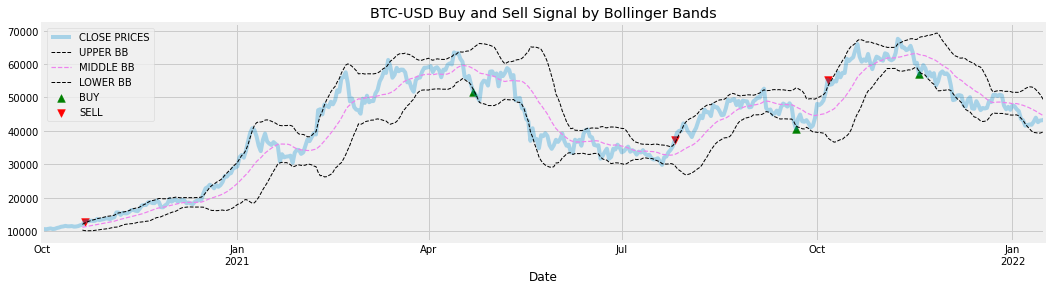

In [233]:
btc_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
btc_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
btc_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
btc_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(btc_data.index, btc_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(btc_data.index, btc_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[0] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
eth_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
eth_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
eth_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
eth_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(eth_data.index, eth_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(eth_data.index, eth_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[1] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
bnb_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
bnb_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
bnb_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
bnb_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(bnb_data.index, bnb_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(bnb_data.index, bnb_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[2] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
usdt_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
usdt_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
usdt_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
usdt_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(usdt_data.index, usdt_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(usdt_data.index, usdt_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[3] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
sol_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
sol_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
sol_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
sol_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(sol_data.index, sol_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(sol_data.index, sol_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[4] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
hex_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
hex_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
hex_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
hex_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(hex_data.index, hex_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(hex_data.index, hex_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[5] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
ada_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
ada_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
ada_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
ada_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(ada_data.index, ada_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(ada_data.index, ada_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[6] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
xrp_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
xrp_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
xrp_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
xrp_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(xrp_data.index, xrp_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(xrp_data.index, xrp_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[7] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
usdc_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
usdc_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
usdc_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
usdc_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(usdc_data.index, usdc_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(usdc_data.index, usdc_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[8] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
luna1_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
luna1_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
luna1_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
luna1_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(luna1_data.index, luna1_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(luna1_data.index, luna1_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[9] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
avax_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
avax_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
avax_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
avax_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(avax_data.index, avax_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(avax_data.index, avax_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[10] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
dot_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
dot_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
dot_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
dot_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(dot_data.index, dot_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(dot_data.index, dot_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[11] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
doge_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
doge_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
doge_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
doge_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(doge_data.index, doge_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(doge_data.index, doge_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[12] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
shib_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
shib_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
shib_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
shib_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(shib_data.index, shib_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(shib_data.index, shib_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[13] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
matic_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
matic_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
matic_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
matic_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(matic_data.index, matic_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(matic_data.index, matic_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[14] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
ltc_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
ltc_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
ltc_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
ltc_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(ltc_data.index, ltc_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(ltc_data.index, ltc_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[15] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
link_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
link_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
link_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
link_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(link_data.index, link_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(link_data.index, link_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[16] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
algo_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
algo_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
algo_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
algo_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(algo_data.index, algo_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(algo_data.index, algo_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[17] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
uni_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
uni_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
uni_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
uni_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(uni_data.index, uni_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(uni_data.index, uni_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[18] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
dai_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, figsize =(16,4))
dai_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
dai_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
dai_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(dai_data.index, dai_data['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(dai_data.index, dai_data['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[19] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left')
plt.show()

In [17]:
def get_diff(data):
    ma = data.rolling(14).mean()
    di = ((data - ma) / ma) * 100
    return di

In [251]:
btc_data['disparity'] = get_diff(btc_data['Close'])
eth_data['disparity'] = get_diff(eth_data['Close'])
bnb_data['disparity'] = get_diff(bnb_data['Close'])
usdt_data['disparity'] = get_diff(usdt_data['Close'])
sol_data['disparity'] = get_diff(sol_data['Close'])
hex_data['disparity'] = get_diff(hex_data['Close'])
ada_data['disparity'] = get_diff(ada_data['Close'])
xrp_data['disparity'] = get_diff(xrp_data['Close'])
usdc_data['disparity'] = get_diff(usdc_data['Close'])
luna1_data['disparity'] = get_diff(luna1_data['Close'])
avax_data['disparity'] = get_diff(avax_data['Close'])
dot_data['disparity'] = get_diff(dot_data['Close'])
doge_data['disparity'] = get_diff(doge_data['Close'])
shib_data['disparity'] = get_diff(shib_data['Close'])
matic_data['disparity'] = get_diff(matic_data['Close'])
ltc_data['disparity'] = get_diff(ltc_data['Close'])
link_data['disparity'] = get_diff(link_data['Close'])
algo_data['disparity'] = get_diff(algo_data['Close'])
uni_data['disparity'] = get_diff(uni_data['Close'])
dai_data['disparity'] = get_diff(dai_data['Close'])

In [252]:
def buy_sell_disparity(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['disparity'][i] > 0:
            if position == False :
                signalBuy.append(data['Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['disparity'][i] < 0:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])

In [253]:
btc_data['Buy_disparity'], btc_data['Sell_disparity'] = buy_sell_disparity(btc_data)
eth_data['Buy_disparity'], eth_data['Sell_disparity'] = buy_sell_disparity(eth_data)
bnb_data['Buy_disparity'], bnb_data['Sell_disparity'] = buy_sell_disparity(bnb_data)
usdt_data['Buy_disparity'], usdt_data['Sell_disparity'] = buy_sell_disparity(usdt_data)
sol_data['Buy_disparity'], sol_data['Sell_disparity'] = buy_sell_disparity(sol_data)
hex_data['Buy_disparity'], hex_data['Sell_disparity'] = buy_sell_disparity(hex_data)
ada_data['Buy_disparity'], ada_data['Sell_disparity'] = buy_sell_disparity(ada_data)
xrp_data['Buy_disparity'], xrp_data['Sell_disparity'] = buy_sell_disparity(xrp_data)
usdc_data['Buy_disparity'], usdc_data['Sell_disparity'] = buy_sell_disparity(usdc_data)
luna1_data['Buy_disparity'], luna1_data['Sell_disparity'] = buy_sell_disparity(luna1_data)
avax_data['Buy_disparity'], avax_data['Sell_disparity'] = buy_sell_disparity(avax_data)
dot_data['Buy_disparity'], dot_data['Sell_disparity'] = buy_sell_disparity(dot_data)
doge_data['Buy_disparity'], doge_data['Sell_disparity'] = buy_sell_disparity(doge_data)
shib_data['Buy_disparity'], shib_data['Sell_disparity'] = buy_sell_disparity(shib_data)
matic_data['Buy_disparity'], matic_data['Sell_disparity'] = buy_sell_disparity(matic_data)
ltc_data['Buy_disparity'], ltc_data['Sell_disparity'] = buy_sell_disparity(ltc_data)
link_data['Buy_disparity'], link_data['Sell_disparity'] = buy_sell_disparity(link_data)
algo_data['Buy_disparity'], algo_data['Sell_disparity'] = buy_sell_disparity(algo_data)
uni_data['Buy_disparity'], uni_data['Sell_disparity'] = buy_sell_disparity(uni_data)
dai_data['Buy_disparity'], dai_data['Sell_disparity'] = buy_sell_disparity(dai_data)

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(btc_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(btc_data.index , btc_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(btc_data.index , btc_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[0] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(eth_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(eth_data.index , eth_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(eth_data.index , eth_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[1] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(bnb_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(bnb_data.index , bnb_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(bnb_data.index , bnb_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[2] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(usdt_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(usdt_data.index , usdt_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(usdt_data.index , usdt_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[3] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(sol_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(sol_data.index , sol_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(sol_data.index , sol_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[4] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(hex_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(hex_data.index , hex_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(hex_data.index , hex_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[5] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(ada_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(ada_data.index , ada_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(ada_data.index , ada_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[6] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(xrp_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(xrp_data.index , xrp_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(xrp_data.index , xrp_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[7] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(usdc_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(usdc_data.index , usdc_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(usdc_data.index , usdc_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[8] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(luna1_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(luna1_data.index , luna1_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(luna1_data.index , luna1_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[9] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(avax_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(avax_data.index , avax_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(avax_data.index , avax_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[10] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(dot_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(dot_data.index , dot_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(dot_data.index , dot_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[11] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(doge_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(doge_data.index , doge_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(doge_data.index , doge_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[12] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(shib_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(shib_data.index , shib_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(shib_data.index , shib_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[13] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(matic_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(matic_data.index , matic_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(matic_data.index , matic_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[14] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(ltc_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(ltc_data.index , ltc_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(ltc_data.index , ltc_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[15] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(link_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(link_data.index , link_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(link_data.index , link_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[16] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(algo_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(algo_data.index , algo_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(algo_data.index , algo_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[17] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(uni_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(uni_data.index , uni_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(uni_data.index , uni_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[18] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

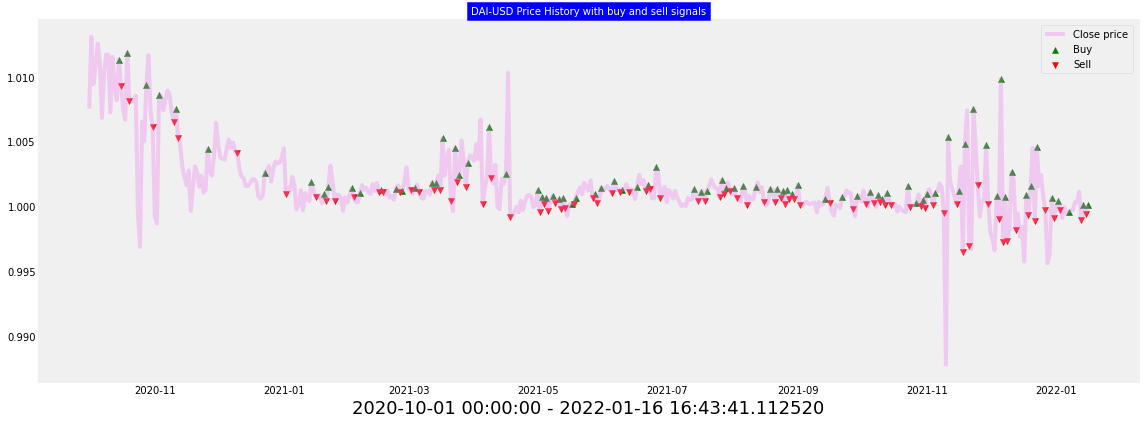

In [272]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(dai_data['Close'], label = 'Close price', alpha = 0.35, color ='violet')
ax.scatter(dai_data.index , dai_data['Buy_disparity'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(dai_data.index , dai_data['Sell_disparity'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[19] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()